### Инструкция по выполнению проекта:

Вы - маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несколько прошлых месяцев ваш бизнес постоянно нес убытки - в привлечение пользователей была вложена куча денег, а толку никакого. Вам нужно разобраться в причинах этой ситуации.

У вас в распоряжении есть лог сервера с данными о посещениях приложения новыми пользователями, зарегистрировавшимися в период с 2019-05-01 по 2019-10-27, выгрузка их покупок за этот период, а также статистика рекламных расходов. Вам предстоит изучить, как люди пользуются продуктом, когда они начинают покупать, сколько денег приносит каждый клиент, когда он окупается и какие факторы отричательно влияют на привлечение пользователей.

#### Шаг 1. Загрузите данные и подготовьте их к анализу
Загрузите данные о визитах, заказах и расходах в переменные. Оптимизируйте данные для анализа. Убедитесь, что тип данных в каждой колонке — правильный. Путь к файлам:

 -   /datasets/visits_info.csv
 -   /datasets/orders_info.csv
 -   /datasets/costs_info.csv

#### Шаг 2. Проведите исследовательский анализ данных

Постройте профили пользователей. Определите минимальную и максимальную дату привлечения пользователей.

Выясните:
- Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
- Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
- По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?

#### Шаг 3. Постройте отчёты и посчитайте метрики
Продукт:

-    Сколько людей пользуются в день, неделю, месяц?
-    Сколько сессий в день?
-    Сколько длится одна сессия?

Продажи:

- Когда люди начинают покупать?
- Сколько покупок делает в среднем платящий пользователь за месяц, неделю, день?
- Какой средний чек за месяц, неделю, день?

Маркетинг:

- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько в среднем стоило привлечение одного покупателя из каждого источника?

#### Шаг 4. Задайте функции для расчета и анализа LTV, ROI, удержания и конверсии

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

#### Шаг 5. Оцените окупаемость рекламы для привлечения пользователей

С помощью LTV и ROI:
- Проанализируйте общую окупаемость рекламы;
- Проанализируйте окупаемость рекламы с разбивкой по устройствам;
- Проанализируйте окупаемость рекламы с разбивкой по странам;
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам.

Опишите проблемы, которые вы обнаружили. Ответьте на вопросы:
- Окупается ли реклама, направленная на привлечение пользователей в целом? 
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости? Изучите конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.

Опишите возможные причины обнаруженных проблем и сформируйте рекомендации для рекламного отдела. При решении этого шага считайте, что вы смотрите данные 1-го ноября 2019 года и что в вашей организации принято считать, что окупаемость должна наступать не позднее, чем через 2 недели после привлечения пользователей.

Подумайте, нужно ли включать в анализ органических пользователей?

#### Шаг 6. Напишите выводы
- Выделите причины неэффективности привлечения пользователей;
- Сформируйте рекомендации для отдела маркетинга для повышения эффективности.

#### Оформление: 
Задание выполните в Jupyter Notebook. Программный код заполните в ячейках типа code, текстовые пояснения — в ячейках типа markdown. Примените форматирование и заголовки.


#### Описание данных
Таблица visits (лог сервера с информацией о посещениях сайта):

    User Id — уникальный идентификатор пользователя
    Device — категория устройства пользователя
    Session start — дата и время начала сессии
    Session End — дата и время окончания сессии
    Channel — идентификатор рекламного источника, из которого пришел пользователь
    Region - страна пользователя

Таблица orders (информация о заказах):

    User Id — уникальный id пользователя, который сделал заказ
    Event Dt — дата и время покупки
    Revenue — выручка

Таблица costs (информация о затратах на маркетинг):

    Channel — идентификатор рекламного источника
    Dt — дата
    Costs — затраты на этот рекламный источник в этот день

# Шаг 1. Загрузите данные и подготовьте их к анализу
Загрузите данные о визитах, заказах и расходах в переменные. Оптимизируйте данные для анализа. Убедитесь, что тип данных в каждой колонке — правильный. Путь к файлам:

 -   /datasets/visits_info.csv
 -   /datasets/orders_info.csv
 -   /datasets/costs_info.csv

1. **Импортируем библиотеки с которыми будет работать.**
2. **Загрузим файлы с данными и сохраним результаты в переменных.**
3. **Получим общую информацию о данных**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter
from pymystem3 import Mystem
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import pprint

In [2]:
df_visits = pd.read_csv('/datasets/visits_info.csv')
df_orders = pd.read_csv('/datasets/orders_info.csv')
df_costs = pd.read_csv('/datasets/costs_info.csv')

In [3]:
display(df_visits.info())
display(df_orders.info())
display(df_costs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None

Дополнительно проверим данные на наличие пропусков

In [4]:
display(df_visits.isna().sum())
display(df_orders.isna().sum())
display(df_costs.isna().sum())

User Id          0
Region           0
Device           0
Channel          0
Session Start    0
Session End      0
dtype: int64

User Id     0
Event Dt    0
Revenue     0
dtype: int64

dt         0
Channel    0
costs      0
dtype: int64

**С целью оптимизации, приведем временные данные в таблицах к одному формату**

In [5]:
time_format = '%d.%m.%Y %H:%M'
df_visits['Session Start'] = pd.to_datetime(df_visits['Session Start'], format = time_format)
df_visits['Session End'] = pd.to_datetime(df_visits['Session End'], format = time_format)
df_orders['Event Dt'] = pd.to_datetime(df_orders['Event Dt'])
df_costs['dt'] = pd.to_datetime(df_costs['dt']).dt.date

**Посмотрим на результаты**

In [6]:
display(df_visits[['Session Start', 'Session End']].info())
display(df_orders['Event Dt'].head(1))
display(df_costs['dt'].head(1))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Session Start  309901 non-null  datetime64[ns]
 1   Session End    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 4.7 MB


None

0   2019-05-01 23:09:52
Name: Event Dt, dtype: datetime64[ns]

0    2019-05-01
Name: dt, dtype: object

**Все получилось. Временные данные из таблицы "df_costs" остались с типом "оbject". Так и должно быть**

In [7]:
#Проверяем данные на явные дубликаты
display(df_visits.duplicated().sum())
display(df_orders.duplicated().sum())
display(df_costs.duplicated().sum())

0

0

0

**В данных явные дубликаты отсутствуют.**

Проверим корректность написания категориальных переменных

In [8]:
display(df_visits['Region'].unique())
display(df_visits['Channel'].unique())
display(df_visits['Device'].unique())
display(df_costs['Channel'].unique())

array(['United States', 'UK', 'France', 'Germany'], dtype=object)

array(['organic', 'TipTop', 'RocketSuperAds', 'YRabbit', 'FaceBoom',
       'MediaTornado', 'AdNonSense', 'LeapBob', 'WahooNetBanner',
       'OppleCreativeMedia', 'lambdaMediaAds'], dtype=object)

array(['iPhone', 'Mac', 'Android', 'PC'], dtype=object)

array(['FaceBoom', 'MediaTornado', 'RocketSuperAds', 'TipTop', 'YRabbit',
       'AdNonSense', 'LeapBob', 'OppleCreativeMedia', 'WahooNetBanner',
       'lambdaMediaAds'], dtype=object)

Дополнительно изучим численные данные на их статистические показатели.

In [9]:
display(df_visits.describe())
display(df_orders.describe())
display(df_costs.describe())
df_visits.head()

,User Id
count,3.099010e+05
mean,4.997664e+11
std,2.887899e+11
min,5.993260e+05
25%,2.493691e+11
50%,4.989906e+11
75%,7.495211e+11
max,9.999996e+11


,User Id,Revenue
count,4.021200e+04,40212.000000
mean,4.990295e+11,5.370608
std,2.860937e+11,3.454208
min,5.993260e+05,4.990000
25%,2.511324e+11,4.990000
50%,4.982840e+11,4.990000
75%,7.433327e+11,4.990000
max,9.998954e+11,49.990000


,costs
count,1800.000000
mean,58.609611
std,107.740223
min,0.800000
25%,6.495000
50%,12.285000
75%,33.600000
max,630.000000


,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:00,2019-05-01 02:45:00
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:00,2019-05-01 04:47:00
2,590706206550,United States,Mac,organic,2019-05-01 14:09:00,2019-05-01 15:32:00
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:00,2019-05-01 00:54:00
4,349773784594,United States,Mac,organic,2019-05-01 03:33:00,2019-05-01 03:57:00


**В целом, мы имеем дело с хорошими данными:**
1. **У нас отсутствуют дубликаты и пропуски.**
2. **Наши категориальные данные написаны корректно.**
3. **Есть пара аномальных значений (например, расходы на рекламу в размере 630), но это не критично. Да и нельзя исключать факт того, что организация действительно могла потратить такие большие деньги на рекламу.**
4. **С целью оптимизации часть временных данных были приведены к одному формату.**


# Шаг 2. Проведите исследовательский анализ данных

Постройте профили пользователей. Определите минимальную и максимальную дату привлечения пользователей.

Выясните:
- Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
- Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
- По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?

**Для начала определим минимальную и максимальную дату привлечения пользователей. Для этого сгруппируем данные по девайсам и определим даты исходя из значений столбца Session Start**

In [10]:
display(df_visits.groupby('Device').agg({'Session Start': 'min'}).sort_values(by='Session Start', ascending = True))
display(df_visits.groupby('Device').agg({'Session Start': 'max'}).sort_values(by='Session Start', ascending = False))

,Session Start
Device,
Mac,2019-05-01 00:00:00
PC,2019-05-01 00:01:00
Android,2019-05-01 00:02:00
iPhone,2019-05-01 00:06:00


,Session Start
Device,
iPhone,2019-10-31 23:59:00
PC,2019-10-31 23:58:00
Android,2019-10-31 23:56:00
Mac,2019-10-31 23:46:00


**Самая ранняя дата привлечения пользователей – 2019.05.01
Самая поздняя – 2019.10.31** 

**Теперь создадим функцию для создания профилей и ответим на ключивые вопросы топика**

In [11]:
def get_profiles(visits, orders):

    profiles = (
        visits.sort_values(by=['User Id', 'Session Start'])
        .groupby('User Id')
        .agg(
            {
                'Session Start': 'first',
                'Channel': 'first',
                'Device': 'first',
                'Region': 'first',
            }
        )
        .rename(columns={'Session Start': 'first_ts'})
        .reset_index()
    )
    
    profiles['payer'] =  profiles['User Id'].isin(orders['User Id'].unique())
    return profiles

# строим профили по двум наборам данных
profiles = get_profiles(df_visits, df_orders)

**Ответим на вопросы: Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?**

In [12]:
display(
    profiles.groupby('Region')
    .agg({'User Id' : 'nunique', 'payer': 'mean'})
    .sort_values(by='User Id', ascending = False)
)

,User Id,payer
Region,,
United States,100002,0.069019
UK,17575,0.039829
France,17450,0.037994
Germany,14981,0.041119


**Ответим на вопросы: Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?**

In [13]:
display(
    profiles.groupby('Device')
    .agg({'User Id' : 'nunique', 'payer': 'mean'})
    .sort_values(by='payer', ascending = False)
)

,User Id,payer
Device,,
Mac,30042,0.063644
iPhone,54479,0.062079
Android,35032,0.058518
PC,30455,0.050468


**Ответим на вопросы: По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?**

In [14]:
display(
    profiles.groupby('Channel')
    .agg({'User Id' : 'nunique', 'payer': 'mean'})
    .sort_values(by='payer', ascending = False)
)

,User Id,payer
Channel,,
FaceBoom,29144,0.122049
AdNonSense,3880,0.113402
lambdaMediaAds,2149,0.104700
TipTop,19561,0.096007
RocketSuperAds,4448,0.079137
WahooNetBanner,8553,0.052964
YRabbit,4312,0.038265
MediaTornado,4364,0.035747
LeapBob,8553,0.030633


1. **Больше всего приходят посетителей из Америки - 66,6 %, соответственно эта страна дает больше всех платящих пользователей - 6,9 %**
2. **Меньше всего приходят посетителей из Германии - 10 %, соответственно эта страна дает меньше всех платящих пользователей -4,1 %**
3. **Пользователи пользуются устройствами четырех типов: mac, iphone, android, pc**
4. **Чаще всего платящие пользователи заходят с утсройства mac - 6,3 %, меньше всего с PC - 5,0 %**
5. **Перечень каналов представлен в таблице выше. Каналы, которые приносят больше всего платящих пользователей - FaceBoom -  12,2 %, AdNonSense - 11,3 %, меньше всего - OppleCreativeMedia - 2,7 %, LeapBob - 3,0 %**
6. **Стоит отметить, что мы имеем внушительное число органических пользователей (56439 ед.), но вот платить они не очень сильно хотят (2,0 %)**

# Шаг 3. Постройте отчёты и посчитайте метрики
Продукт:

-    Сколько людей пользуются в день, неделю, месяц?
-    Сколько сессий в день?
-    Сколько длится одна сессия?

Продажи:

- Когда люди начинают покупать?
- Сколько покупок делает в среднем платящий пользователь за месяц, неделю, день?
- Какой средний чек за месяц, неделю, день?

Маркетинг:

- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько в среднем стоило привлечение одного покупателя из каждого источника?

### Продукт:
-    **Сколько людей пользуются в день, неделю, месяц?**

**2.1.** Для ответа на поставленные вопросы, создадим отдельные столбцы с датами в разрезе дня, недели, месяца

In [15]:
df_visits['session_year'] = df_visits['Session Start'].dt.year
df_visits['session_week'] = df_visits['Session Start'].dt.week
df_visits['session_month'] = df_visits['Session Start'].dt.month
df_visits['session_date'] = df_visits['Session Start'].dt.date
df_visits.head()

/tmp/ipykernel_31/2079843271.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df_visits['session_week'] = df_visits['Session Start'].dt.week


,User Id,Region,Device,Channel,Session Start,Session End,session_year,session_week,session_month,session_date
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:00,2019-05-01 02:45:00,2019,18,5,2019-05-01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:00,2019-05-01 04:47:00,2019,18,5,2019-05-01
2,590706206550,United States,Mac,organic,2019-05-01 14:09:00,2019-05-01 15:32:00,2019,18,5,2019-05-01
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:00,2019-05-01 00:54:00,2019,18,5,2019-05-01
4,349773784594,United States,Mac,organic,2019-05-01 03:33:00,2019-05-01 03:57:00,2019,18,5,2019-05-01


**2.2.** Рассчитаем следующие показатели: dau_total, wau_total, mau_total

In [16]:
dau_total = (
    df_visits.groupby('session_date').agg({'User Id': 'nunique'}).mean()
)
display(dau_total)

wau_total = (
    df_visits.groupby(['session_year', 'session_week'])
    .agg({'User Id': 'nunique'})
    .mean()
)
display(wau_total)

mau_total = (
    df_visits.groupby(['session_year', 'session_month'])
    .agg({'User Id': 'nunique'})
    .mean()
)
display(mau_total)

User Id    1684.23913
dtype: float64

User Id    8353.777778
dtype: float64

User Id    28989.166667
dtype: float64

**2.3.** Отобразим изменения метрик во времени на графиках

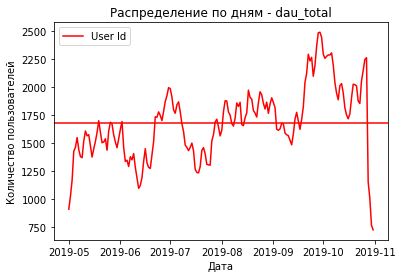

In [17]:
df_visits.groupby('session_date').agg({'User Id': 'nunique'}).plot(title="Распределение по дням - dau_total", color='red')
plt.axhline(y=int(dau_total), color='r', linestyle='-')
plt.ylabel('Количество пользователей')
plt.xlabel('Дата')
plt.show()

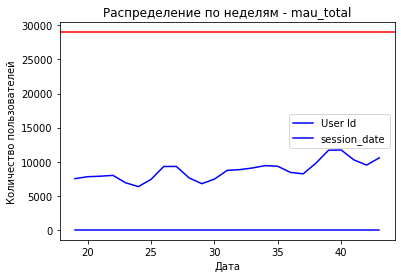

In [18]:
(df_visits
 .groupby(['session_week'])
 .agg({'User Id': 'nunique', 'session_date' : 'nunique'})
 .query('session_date == 7')
 .plot(title="Распределение по неделям - mau_total", color='blue')
)
plt.axhline(y=int(mau_total), color='r', linestyle='-')
plt.ylabel('Количество пользователей')
plt.xlabel('Дата')
plt.show()

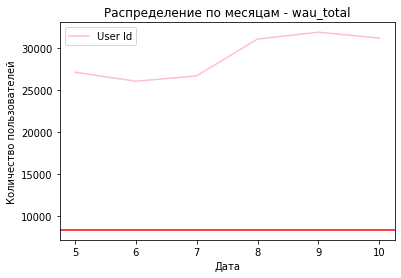

In [19]:
df_visits.groupby('session_month').agg({'User Id': 'nunique'}).plot(title="Распределение по месяцам - wau_total", color='pink')
plt.axhline(y=int(wau_total), color='r', linestyle='-')
plt.ylabel('Количество пользователей')
plt.xlabel('Дата')
plt.show()

1. Среднее количество пользователей, посещающих сайт в день –  **1684** человека 
2. Среднее количество пользователей, посещающих сайт в неделю –  **8353** человек
3. Среднее количество пользователей, посещающих сайт в месяц –  **28989** человек
4. По данным графиков, видно, что прослеживается положительная динамика по увеличению охвата (так с **4000** тысяч пользователей, посещающих сайт, охват достигал пиковые значения на отметке **12000** тысяч (увеличение в **3** раза). В разрезе месяцев, в период с 5 по 10 месяц, произошло общее увеличение пользовательской активности с **27111** заходов в месяц до **31175** заходов в месяц (увеличение на **13** %). Вместе с тем, отмечается, что в разрезе недель -на 44 неделе (последняя неделя в рамках анализа) охват пользователей резко упал до **3118** посещений, что является минимальным значением в рассматриваемых данных.


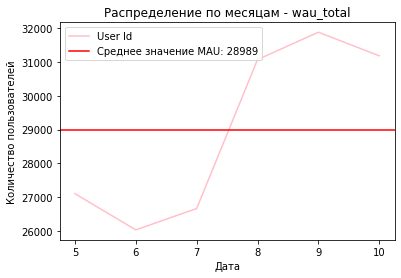

In [20]:
df_visits.groupby('session_month').agg({'User Id': 'nunique'}).plot(title="Распределение по месяцам - wau_total", color='pink')
plt.axhline(y=int(mau_total), color='r', linestyle='-', label = ("Среднее значение MAU: " + str(int(mau_total[0]))))
plt.legend()
plt.ylabel('Количество пользователей')
plt.xlabel('Дата')
plt.show()

-    **Сколько сессий в день?**

Разделим число сессий на количество пользователей за день. Для этого сгруппируем данные по столбцам session_year и session_date, посчитаем количество сессий — всех и уникальных, а затем разделим одно на другое.

<AxesSubplot:title={'center':'Распределение по сессиям'}, ylabel='Frequency'>

n_sessions  n_users  sessions_per_user  \
session_year session_date                                           
2019         2019-05-01           909      909                1.0   
             2019-05-02          1026     1026                1.0   
             2019-05-03          1170     1170                1.0   
             2019-05-04          1429     1429                1.0   
             2019-05-05          1463     1463                1.0   
...                               ...      ...                ...   
             2019-10-27          2265     2265                1.0   
             2019-10-28          1155     1155                1.0   
             2019-10-29          1005     1005                1.0   
             2019-10-30           764      764                1.0   
             2019-10-31           724      724                1.0   

                           sessions_per_user_mean  
session_year session_date                          
2019         2019-05-01                  1.000003  
             2019-05-02                  1.000003  
             2019-05-03                  1.000003  
             2019-05-04                  1.000003  
             2019-05-05                  1.000003  
...                                           ...  
             2019-10-27                  1.000003  
             2019-10-28                  1.000003  
             2019-10-29                  1.000003  
             2019-10-30                  1.000003  
             2019-10-31                  1.000003  

[184 rows x 4 columns]

Text(0.5, 0, 'Количество сессий')

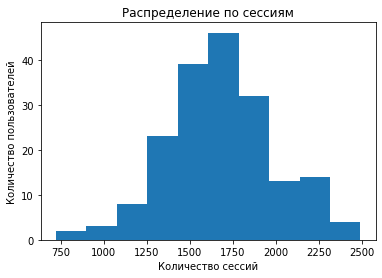

In [21]:
sessions_per_user = df_visits.groupby(['session_year', 'session_date']).agg(
    {'User Id': ['count', 'nunique']}
)
sessions_per_user.columns = ['n_sessions', 'n_users']
sessions_per_user['sessions_per_user'] = (
    sessions_per_user['n_sessions'] / sessions_per_user['n_users']
)
sessions_per_user['sessions_per_user_mean'] = sessions_per_user['sessions_per_user'].mean()
display(sessions_per_user['n_sessions'].plot(kind='hist', bins=10, title="Распределение по сессиям"))
display(sessions_per_user)
plt.ylabel('Количество пользователей')
plt.xlabel('Количество сессий')

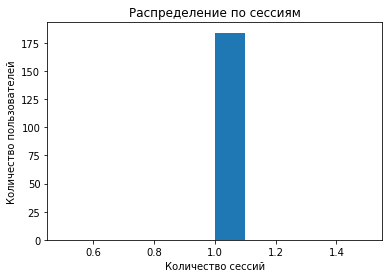

In [22]:
sessions_per_user['sessions_per_user_mean'].plot(kind='hist', bins=10, title="Распределение по сессиям")
plt.ylabel('Количество пользователей')
plt.xlabel('Количество сессий')
plt.show()

**В целом, картина достаточно печальная. Получается, что среднее значение сессий в ежедневном формате равняется 1. Это говорит нам о том, что пользователи не заинтересованы в том, чтобы повторно заходить в приложение. Это тревожный звоночек.**

-    **Сколько длится одна сессия?**

Найдём ASL — посчитаем длительность всех сессий и вычислим среднее.

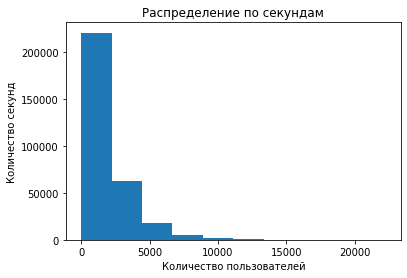

count    309901.000000
mean       1800.084801
std        1803.189827
min           0.000000
25%         540.000000
50%        1260.000000
75%        2520.000000
max       22260.000000
Name: session_duration_sec, dtype: float64

In [23]:
df_visits['session_duration_sec'] = (
    df_visits['Session End'] - df_visits['Session Start']
).dt.seconds
df_visits['session_duration_sec'].plot(kind='hist', bins=10, title="Распределение по секундам")
plt.ylabel('Количество секунд')
plt.xlabel('Количество пользователей')
plt.show()
display(df_visits['session_duration_sec'].describe())

1. **Секунды, проведённые пользователями в приложении, имеют экспоненциальное распределение с пиком в районе нуля. И это нормально — в любом цифровом сервисе очень многие сессии заканчиваются техническими ошибками.**
2. **В среднем, пользователь проводит в приложении около 30 минут.**
3. **Медианное значение равно 21 минуте.**


### Продажи:

- **Когда люди начинают покупать?**

Для начала построим функцию, которая поможет нам сгруппировать пользователей по id, а также определит первые покупки

In [24]:
def get_profiles_orders(orders):

    profiles = (
        orders.sort_values(by=['User Id', 'Event Dt'])
        .groupby('User Id')
        .agg(
            {
                'Event Dt': 'first',
                'Revenue': 'first',
            }
        )
        .rename(columns={'Event Dt': 'first_order'})
        .reset_index()
    )
    
    return profiles

Теперь объединим таблицы с пользователями и покупками 

In [25]:
orders_info = get_profiles_orders(df_orders)
result_raw = profiles.merge(
             orders_info, on = 'User Id', how='left'
)
result_raw.head()

,User Id,first_ts,Channel,Device,Region,payer,first_order,Revenue
0,599326,2019-05-07 20:58:00,FaceBoom,Mac,United States,True,2019-05-07 20:59:09,4.99
1,4919697,2019-07-09 12:46:00,FaceBoom,iPhone,United States,False,NaT,NaN
2,6085896,2019-10-01 09:58:00,organic,iPhone,France,False,NaT,NaN
3,22593348,2019-08-22 21:35:00,AdNonSense,PC,Germany,False,NaT,NaN
4,31989216,2019-10-02 00:07:00,YRabbit,iPhone,United States,False,NaT,NaN


1. Посчитаем сколько времени в среднем проходит с момента первого посещения до покупки
2. Избавимся от NAN задав условие для столбца payer == True

In [26]:
result_raw['orders_sec'] = (result_raw['first_order'] - result_raw['first_ts']).dt.total_seconds()
result_total = result_raw.loc[result_raw['payer'] == True]
display(result_total)

,User Id,first_ts,Channel,Device,Region,payer,first_order,Revenue,orders_sec
0,599326,2019-05-07 20:58:00,FaceBoom,Mac,United States,True,2019-05-07 20:59:09,4.99,69.0
7,46006712,2019-06-30 03:46:00,AdNonSense,Android,France,True,2019-06-30 03:46:52,4.99,52.0
61,374052872,2019-08-08 15:42:00,TipTop,Mac,United States,True,2019-08-16 07:44:47,4.99,662567.0
71,414791703,2019-05-03 12:01:00,TipTop,iPhone,United States,True,2019-05-04 18:06:41,4.99,108341.0
124,785077127,2019-06-27 08:31:00,TipTop,Mac,United States,True,2019-06-30 18:35:15,4.99,295455.0
...,...,...,...,...,...,...,...,...,...
149936,999625937544,2019-10-26 06:24:00,YRabbit,Android,United States,True,2019-10-26 06:24:27,4.99,27.0
149943,999645428220,2019-10-01 05:35:00,TipTop,Mac,United States,True,2019-10-01 05:36:23,4.99,83.0
149946,999659859721,2019-09-04 10:33:00,organic,Mac,France,True,2019-09-08 01:28:08,4.99,312908.0
149972,999779032958,2019-07-04 10:56:00,TipTop,iPhone,United States,True,2019-07-05 23:28:13,4.99,131533.0


In [27]:
result_total['orders_sec'].describe()

count    8.881000e+03
mean     1.627107e+05
std      5.215402e+05
min      0.000000e+00
25%      4.100000e+01
50%      7.000000e+01
75%      1.277320e+05
max      1.141890e+07
Name: orders_sec, dtype: float64

1. **В среднем, для завершения покупки, человеку необходимо потратить 260 минут**
2. **Если брать во внимание медианное значение, то показатель будет равен 1 минуте**
3. **Такая большая разница между среднем и медианной определена наличием аномальных значений** 

- **Сколько покупок делает в среднем платящий пользователь за месяц, неделю, день?**

Для ответа на поставленные вопросы, создадим отдельные столбцы с датами в разрезе дня, недели, месяца

In [28]:
df_orders['orders_year'] = df_orders['Event Dt'].dt.year
df_orders['orders_week'] = df_orders['Event Dt'].dt.week
df_orders['orders_month'] = df_orders['Event Dt'].dt.month
df_orders['orders_date'] = df_orders['Event Dt'].dt.date
df_orders.head()

/tmp/ipykernel_31/1177682304.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df_orders['orders_week'] = df_orders['Event Dt'].dt.week


,User Id,Event Dt,Revenue,orders_year,orders_week,orders_month,orders_date
0,188246423999,2019-05-01 23:09:52,4.99,2019,18,5,2019-05-01
1,174361394180,2019-05-01 12:24:04,4.99,2019,18,5,2019-05-01
2,529610067795,2019-05-01 11:34:04,4.99,2019,18,5,2019-05-01
3,319939546352,2019-05-01 15:34:40,4.99,2019,18,5,2019-05-01
4,366000285810,2019-05-01 13:59:51,4.99,2019,18,5,2019-05-01


**Для того чтобы рассчитать среднее количество покупок на одного покупателя нужно определить уникальное количество покупателей и общее количество покупателей. С учетом того, что наличие покупателя в данной таблице подразумевает совершение покупки, то нам необходимо общее количество покупателей (число покупок) поделить на число уникальных покупателей. Таким образом мы сможем рассчитать среднее количество покупок на одного покупателя.**

In [29]:
order_day = (
            df_orders.groupby('orders_date').agg({'User Id': ['nunique', 'count']}).reset_index())
order_week = (
            df_orders.groupby('orders_week').agg({'User Id': ['nunique', 'count']}).reset_index())
order_month = (
            df_orders.groupby('orders_month').agg({'User Id': ['nunique', 'count']}).reset_index())


display(order_day.head())
display(order_week.head())
display(order_month.head())

orders_date User Id      
              nunique count
0  2019-05-01      25    25
1  2019-05-02      29    29
2  2019-05-03      44    44
3  2019-05-04      56    56
4  2019-05-05      58    58

orders_week User Id      
              nunique count
0          18     156   212
1          19     372   568
2          20     466   706
3          21     574   808
4          22     698   982

orders_month User Id      
               nunique count
0            5    1226  2962
1            6    2130  4875
2            7    2801  6556
3            8    3476  7582
4            9    4124  8430

In [30]:
order_day['mean'] = order_day['User Id']['count'] / order_day['User Id']['nunique']
display(order_day['mean'])
display(sum(order_day['mean'])/len(order_day['mean']))

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
179    1.0
180    1.0
181    1.0
182    1.0
183    1.0
Name: mean, Length: 184, dtype: float64

1.0000345022303812

In [31]:
order_week['mean'] = order_week['User Id']['count'] / order_week['User Id']['nunique']
display(order_week['mean'])
display(sum(order_week['mean'])/len(order_week['mean']))

0     1.358974
1     1.526882
2     1.515021
3     1.407666
4     1.406877
5     1.402490
6     1.332474
7     1.380952
8     1.314796
9     1.347044
10    1.351254
11    1.319343
12    1.284665
13    1.328767
14    1.301282
15    1.311463
16    1.298141
17    1.291461
18    1.291981
19    1.258560
20    1.263835
21    1.313904
22    1.294486
23    1.278727
24    1.260870
25    1.256207
26    1.121775
Name: mean, dtype: float64

1.3266628820826014

In [32]:
order_month['mean'] = order_month['User Id']['count'] / order_month['User Id']['nunique']
display(order_month['mean'])
display(sum(order_month['mean'])/len(order_month['mean']))

0    2.415987
1    2.288732
2    2.340593
3    2.181243
4    2.044132
5    2.100000
Name: mean, dtype: float64

2.228447784645054

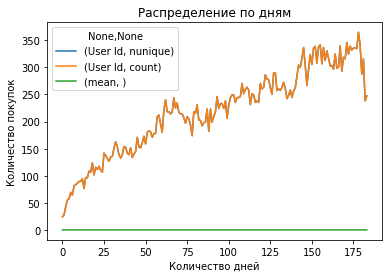

In [33]:
order_day.plot(title="Распределение по дням")
plt.ylabel('Количество покупок')
plt.xlabel('Количество дней')
plt.show()

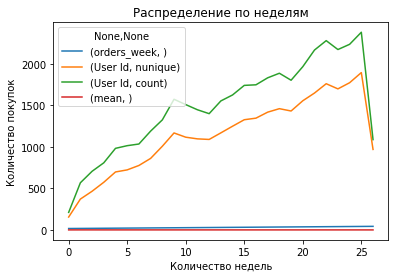

In [34]:
order_week.plot(title="Распределение по неделям")
plt.ylabel('Количество покупок')
plt.xlabel('Количество недель')
plt.show()

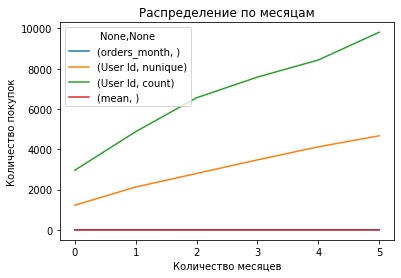

In [35]:
order_month.plot(title="Распределение по месяцам")
plt.ylabel('Количество покупок')
plt.xlabel('Количество месяцев')
plt.show()

1. **Среднее количество покупок на одного покупателя за день - 1**
2. **За неделю - 1,3**
3. **За месяц - 2,2**

- **Какой средний чек за месяц, неделю, день?**

Для начала определим средний чек для каждого отдельного покупателя. Будем действовать по принципу, обазначенному выше.

In [36]:
order_day_cash = (
            df_orders.groupby('orders_date').agg({'Revenue': 'sum', 'User Id': 'nunique'}).reset_index())
order_week_cash = (
            df_orders.groupby('orders_week').agg({'Revenue': 'sum', 'User Id': 'nunique'}).reset_index())
order_month_cash = (
            df_orders.groupby('orders_month').agg({'Revenue': 'sum', 'User Id': 'nunique'}).reset_index())

order_day_cash['mean'] = order_day_cash['Revenue'] / order_day_cash['User Id']
order_week_cash['mean'] = order_week_cash['Revenue'] / order_week_cash['User Id']
order_month_cash['mean'] = order_month_cash['Revenue'] / order_month_cash['User Id']

display(order_day_cash.head())
display(order_week_cash.head())
display(order_month_cash.head())

,orders_date,Revenue,User Id,mean
0,2019-05-01,125.75,25,5.030000
1,2019-05-02,144.71,29,4.990000
2,2019-05-03,221.56,44,5.035455
3,2019-05-04,327.44,56,5.847143
4,2019-05-05,337.42,58,5.817586


,orders_week,Revenue,User Id,mean
0,18,1156.88,156,7.415897
1,19,3061.32,372,8.229355
2,20,3731.94,466,8.008455
3,21,4170.92,574,7.266411
4,22,5349.18,698,7.663582


,orders_month,Revenue,User Id,mean
0,5,15787.38,1226,12.877145
1,6,26428.25,2130,12.407629
2,7,35988.44,2801,12.848426
3,8,40401.18,3476,11.622894
4,9,44941.70,4124,10.897599


In [37]:
display(sum(order_day_cash['mean'])/len(order_day_cash['mean']))
display(sum(order_week_cash['mean'])/len(order_week_cash['mean']))
display(sum(order_month_cash['mean'])/len(order_month_cash['mean']))

5.376070794585148

7.133451574894455

11.979610214532578

1. **С учетом того, что выручка с одно продукта у нас равна 4,99, то в среднем на одного пользователя приходится средний чек в день в размере 5,4, в неделю – 7,1, в месяц – 12,0. Считаю, что это достаточно хороший показатель, ведь в среднем один пользователь совершает 3 покупки в месяц.**
2. **Теперь построим график изменений этих метрик.**


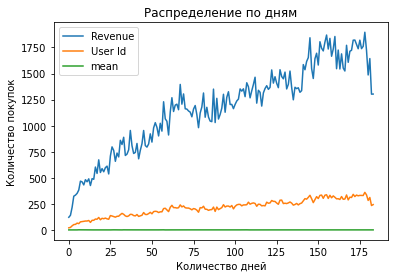

In [38]:
order_day_cash.plot(title="Распределение по дням")
plt.ylabel('Количество покупок')
plt.xlabel('Количество дней')
plt.show()

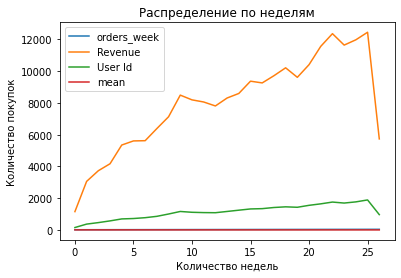

In [39]:
order_week_cash.plot(title="Распределение по неделям")
plt.ylabel('Количество покупок')
plt.xlabel('Количество недель')
plt.show()

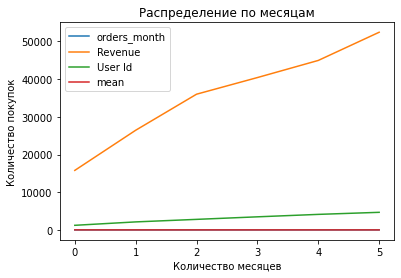

In [40]:
order_month_cash.plot(title="Распределение по месяцам")
plt.ylabel('Количество покупок')
plt.xlabel('Количество месяцев')
plt.show()

1. **В целом, мы можем наблюдать положительную динамику по увеличению выручки. Средний чек, соответственно, тоже растет.**
2. **Теперь определим средний чек без привязки к уникальным пользователям (т.е. все покупки приравняем к общему количество пользователей в таблице).** 


In [41]:
day_bill = df_orders.groupby('orders_date').agg({'Revenue': 'mean'}).reset_index()
week_bill = df_orders.groupby('orders_week').agg({'Revenue': 'mean'}).reset_index()
month_bill = df_orders.groupby('orders_month').agg({'Revenue': 'mean'}).reset_index()
display(day_bill.head())
display(week_bill.head())
display(month_bill.head())

,orders_date,Revenue
0,2019-05-01,5.030000
1,2019-05-02,4.990000
2,2019-05-03,5.035455
3,2019-05-04,5.847143
4,2019-05-05,5.817586


,orders_week,Revenue
0,18,5.456981
1,19,5.389648
2,20,5.286034
3,21,5.162030
4,22,5.447230


,orders_month,Revenue
0,5,5.329973
1,6,5.421179
2,7,5.489390
3,8,5.328565
4,9,5.331163


**Средний чек в разрезе дня, недели, месяца будет в диапозоне с 5 до 6.**

### Маркетинг:

- **Сколько денег потратили? Всего / на каждый источник / по времени**

In [42]:
df_costs_channel = df_costs.groupby('Channel').agg({'costs': 'sum'}).reset_index()
df_costs_time = df_costs.groupby('dt').agg({'costs': 'sum'}).reset_index()
display(df_costs_channel)
display(df_costs_time.head())
print('Общая сумма затрат - ', int(sum(df_costs_channel['costs'])))

,Channel,costs
0,AdNonSense,3911.25
1,FaceBoom,32445.60
2,LeapBob,1797.60
3,MediaTornado,954.48
4,OppleCreativeMedia,2151.25
5,RocketSuperAds,1833.00
6,TipTop,54751.30
7,WahooNetBanner,5151.00
8,YRabbit,944.22
9,lambdaMediaAds,1557.60


,dt,costs
0,2019-05-01,304.820
1,2019-05-02,230.845
2,2019-05-03,263.070
3,2019-05-04,337.000
4,2019-05-05,319.905


Общая сумма затрат -  105497


Text(0.5, 1.0, 'Динамика затрат по датам')

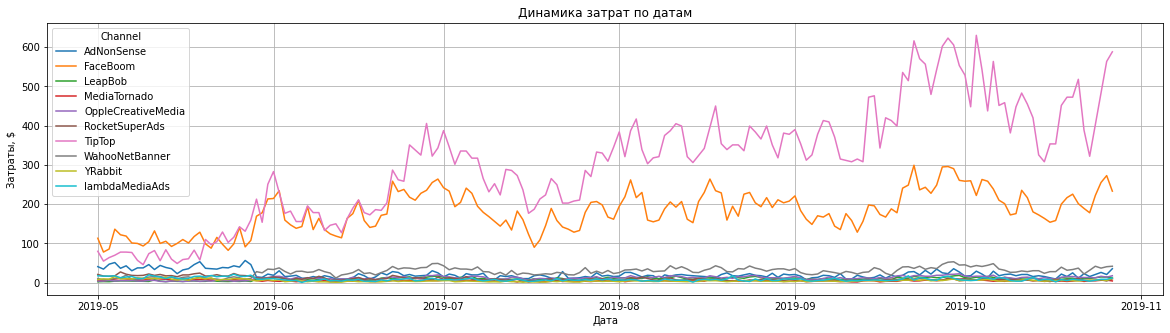

In [43]:
df_costs.pivot_table(
    index='dt', columns='Channel', values='costs', aggfunc='mean'
).plot(grid=True, figsize=(20, 5))
plt.ylabel('Затраты, $')
plt.xlabel('Дата')
plt.title('Динамика затрат по датам')

1. **Общая сумма затрат - 105497**
2. **Больше всего вложили денег в следующие истончики: TipTop - 54751.30, FaceBoom - 32445.60**

- **Сколько в среднем стоило привлечение одного пользователя из каждого источника?**

**Чтобы рассчитать и проанализировать CAC, добавим данные о тратах на рекламу в фунцию get_profiles**

In [44]:
# добавляем параметр ad_costs — траты на рекламу
def get_profiles_cac(visits, orders, ad_costs):
    profiles = (
       visits.sort_values(by=['User Id', 'Session Start'])
        .groupby('User Id')
        .agg(
            {
                'Session Start': 'first',
                'Channel': 'first',
                'Device': 'first',
                'Region': 'first',
            }
        )
        .rename(columns={'Session Start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['User Id'].isin(orders['User Id'].unique())
    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'Channel'])
        .agg({'User Id': 'nunique'})
         # столбец с числом пользователей назовём unique_users
        .rename(columns={'User Id': 'unique_users'})
        .reset_index()  # возвращаем dt и channel из индексов
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    # по дате и каналу привлечения
    ad_costs = ad_costs.merge(new_users, on=['dt', 'Channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    # результаты сохраним в столбец acquisition_cost (CAC)
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавим стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'Channel', 'acquisition_cost']],
        on=['dt', 'Channel'],
        how='left',
    )

    # органические пользователи не связаны с данными о рекламе,
    # поэтому в столбце acquisition_cost у них значения NaN
    # заменим их на ноль, ведь стоимость привлечения равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)
    
    return profiles  # возвращаем профили с CAC

In [45]:
profiles_CAC = get_profiles_cac(df_visits, df_orders, df_costs)
display(profiles_CAC.head())

,User Id,first_ts,Channel,Device,Region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:00,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:00,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:00,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:00,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:00,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


Теперь для наглядности нам необходимо построить график.

Text(0.5, 1.0, 'Динамика САС по каналам привлечения')

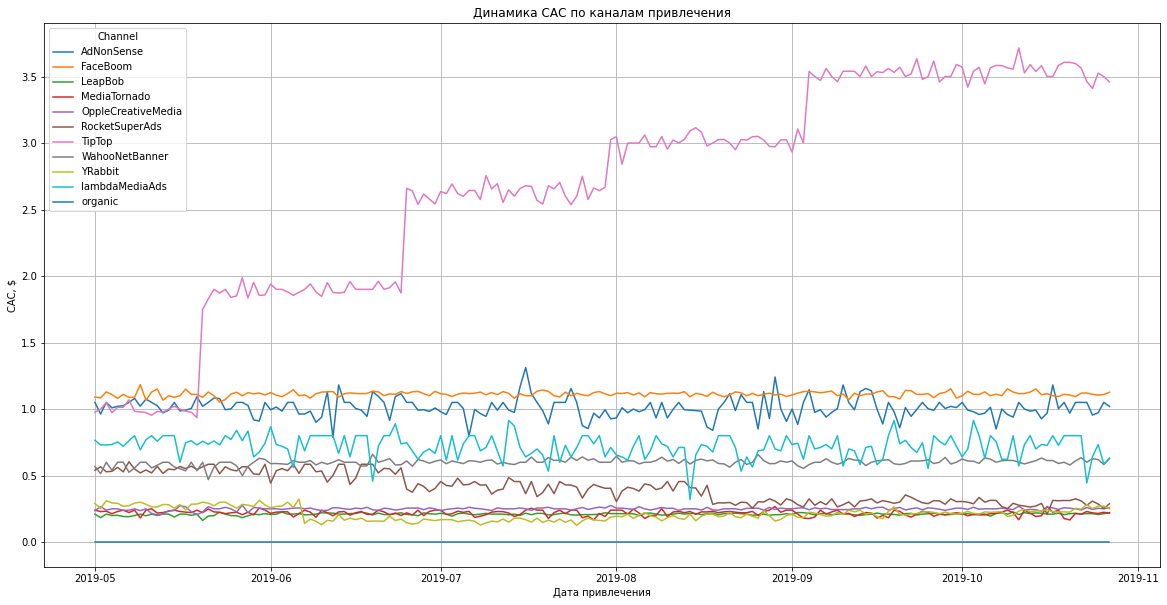

In [46]:
profiles_CAC.pivot_table(
    index='dt', columns='Channel', values='acquisition_cost', aggfunc='mean'
).plot(grid=True, figsize=(20, 10))
plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')

**Исходя из данных графика видно, что средние затраты по привлечению пользователей, в основном, держатся в районе 1 доллара. Но есть и исключение в виде источника Tiptop: средние затраты выросли с 1 до 3,5 доллара. Видимо заказчик решил сосредоточится именно на этом источнике для привлечение пользователей, но окупились ли его затраты? Это нам еще предстоит выяснить.**

Подводя итоги по разделу, отмечается:
1. **Среднее количество покупок на одного покупателя за день - 1, за неделю - 1.3, за месяц 2.2**
2.  **В среднем на одного пользователя приходится средний чек в день в размере 5,4, в неделю – 7,1, в месяц – 12,0. В среднем один пользователь совершает 3 покупки в месяц.**
3. **Мы можем наблюдать положительную динамику по увеличению выручки. Средний чек, соответственно, тоже растет.**
4. **Больше всего вложили денег в следующие истончики: TipTop - 54751.30, FaceBoom - 32445.60**
5. **Средние затраты по Tiptop выросли с 1 до 3,5 доллара**

# Шаг 4. Задайте функции для расчета и анализа LTV, ROI, удержания и конверсии

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

4.1. **Создаем функцию для расчета конверсии**

In [47]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    first_purchases = (
        purchases.sort_values(by=['User Id', 'Event Dt'])
        .groupby('User Id')
        .agg({'Event Dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['User Id', 'Event Dt']], on='User Id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['Event Dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу конверсии
        result = df.pivot_table(
            index=dims, columns='lifetime', values='User Id', aggfunc='nunique'
        )
        # считаем сумму с накоплением для каждой строки
        result = result.fillna(0).cumsum(axis = 1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'User Id': 'nunique'})
            .rename(columns={'User Id': 'cohort_size'})
        )
        # добавляем размеры когорт в таблицу конверсии
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

4.2. **Создадим функцию для удержания**

In [48]:
df_visits['payer'] =  profiles['User Id'].isin(df_orders['User Id'].unique())
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['User Id', 'Session Start']], on='User Id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['Session Start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='User Id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'User Id': 'nunique'})
            .rename(columns={'User Id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

4.3. **функция для расчёта LTV и ROI**

In [49]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['User Id', 'Event Dt', 'Revenue']], on='User Id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['Event Dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='Revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'User Id': 'nunique'})
            .rename(columns={'User Id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['User Id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

4.4. **Создадим одну функцию для построения графика удержания**

In [50]:
def plot_retention(retention, retention_history, horizon):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержания первого дня
    retention = retention.drop(columns=['cohort_size', 0])

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey = ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные, строим сводную таблицу и график по ней
    retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon-1, aggfunc='mean'
    ).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    # в четвёртой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey = ax3)
    # фильтруем данные, строим сводную таблицу и график по ней
    retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    ).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # исключаем наложение графиков друг на друга
    plt.tight_layout()

4.5. **функция для сглаживания фрейма**

In [51]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

4.6. **функция для визуализации LTV и ROI**

In [52]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

4.7. **функция для визуализации конверсии**

In [53]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

# Шаг 5. Оцените окупаемость рекламы для привлечения пользователей

С помощью LTV и ROI:
- Проанализируйте общую окупаемость рекламы;
- Проанализируйте окупаемость рекламы с разбивкой по устройствам;
- Проанализируйте окупаемость рекламы с разбивкой по странам;
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам.

Опишите проблемы, которые вы обнаружили. Ответьте на вопросы:
- Окупается ли реклама, направленная на привлечение пользователей в целом? 
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости? Изучите конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.

Опишите возможные причины обнаруженных проблем и сформируйте рекомендации для рекламного отдела. При решении этого шага считайте, что вы смотрите данные 1-го ноября 2019 года и что в вашей организации принято считать, что окупаемость должна наступать не позднее, чем через 2 недели после привлечения пользователей.

### Проанализируйте общую окупаемость рекламы

5.1. Для начала еще раз взглянем на наши профили пользователей

In [54]:
profiles_CAC.head()

,User Id,first_ts,Channel,Device,Region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:00,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:00,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:00,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:00,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:00,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


5.2. Далее уберем из нашей таблицы всех пользователей "organic". Это нужно для того, чтобы результаты получились более чистыми

In [55]:
profiles_CAC = profiles_CAC.query('"organic" not in Channel')

5.3. Теперь установим момент и горизонт анализа

In [56]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа 

5.4. Теперь с помощью сформированных функций, попробуем оценить общую окупаемость рекламы

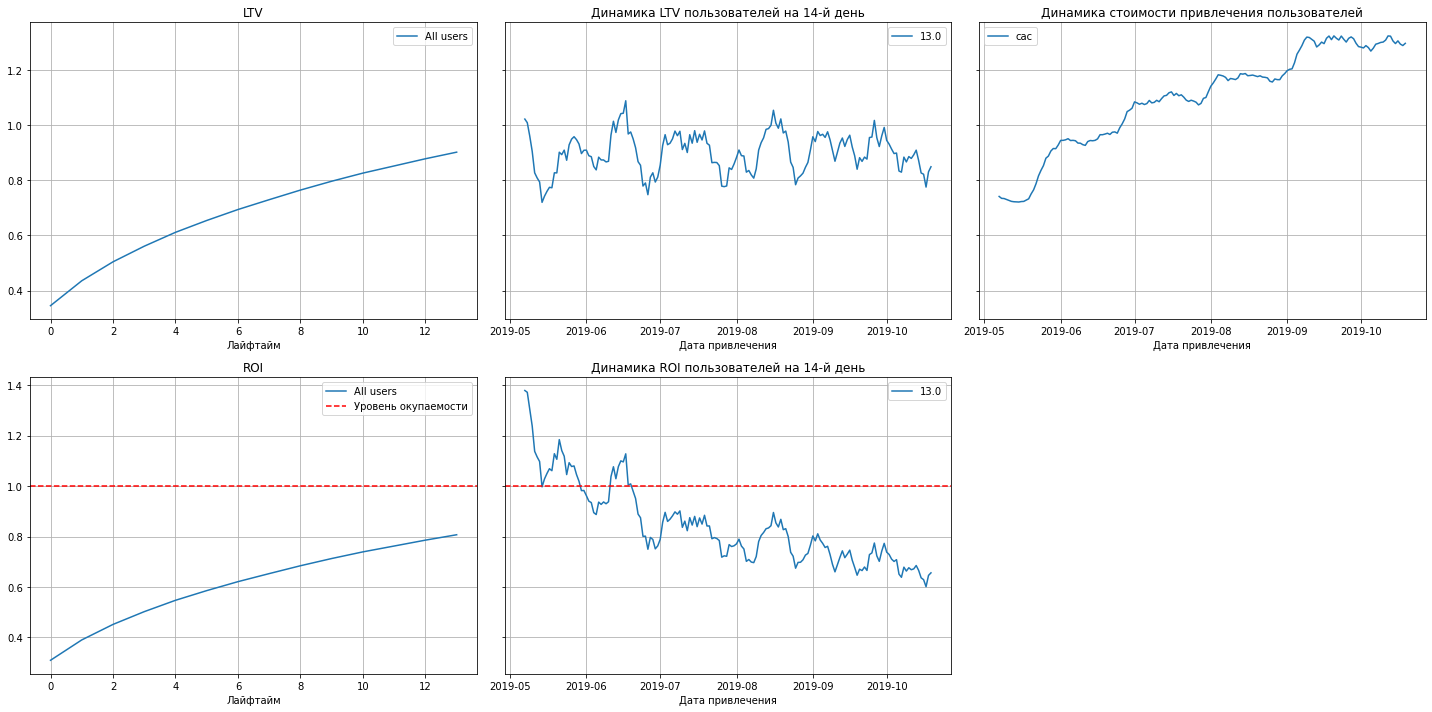

In [57]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_CAC, df_orders, observation_date, horizon_days
)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

1. **Реклама не окупается. ROI в конце недели — чуть выше 80%.**
2. **CAC когорты — постоянная величина для всех лайфтаймов. Ключевое слово - когорты. При расчетах в рамках когорты CAC не меняется, но это не значит, что цена закупки пользователей не может скакать. Таким образом, мы наблюдаем незначительное увеличение цены по закупке пользователей.**
3. **Мы видем, что средняя накопительная выручка растет (LTV), но этого недостаточно для окупаемости рекламы.**

### Проанализируйте окупаемость рекламы с разбивкой по устройствам

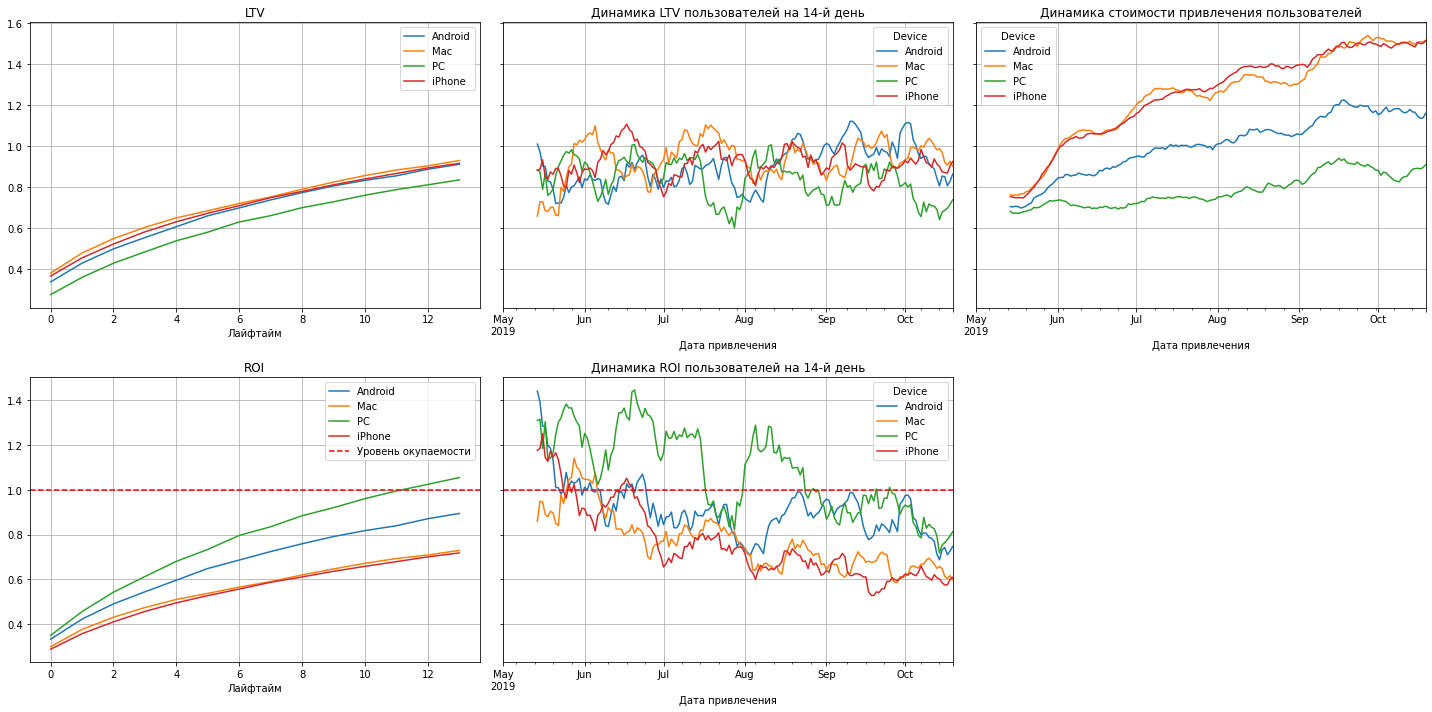

In [58]:
dimensions = ['Device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_CAC, df_orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

1. **Мы наблюдаем интересное явление: стоимость привлечения пользователей, заходящих с Mac и iPhone у нас значительно возрастает, при этом окупаемость у них самая низкая.**
2. **При этом пользователи, заходящие с PC смогли окупиться, имея при этом самые низкие вложения по привлечению клиентов.**

### Проанализируйте окупаемость рекламы с разбивкой по странам

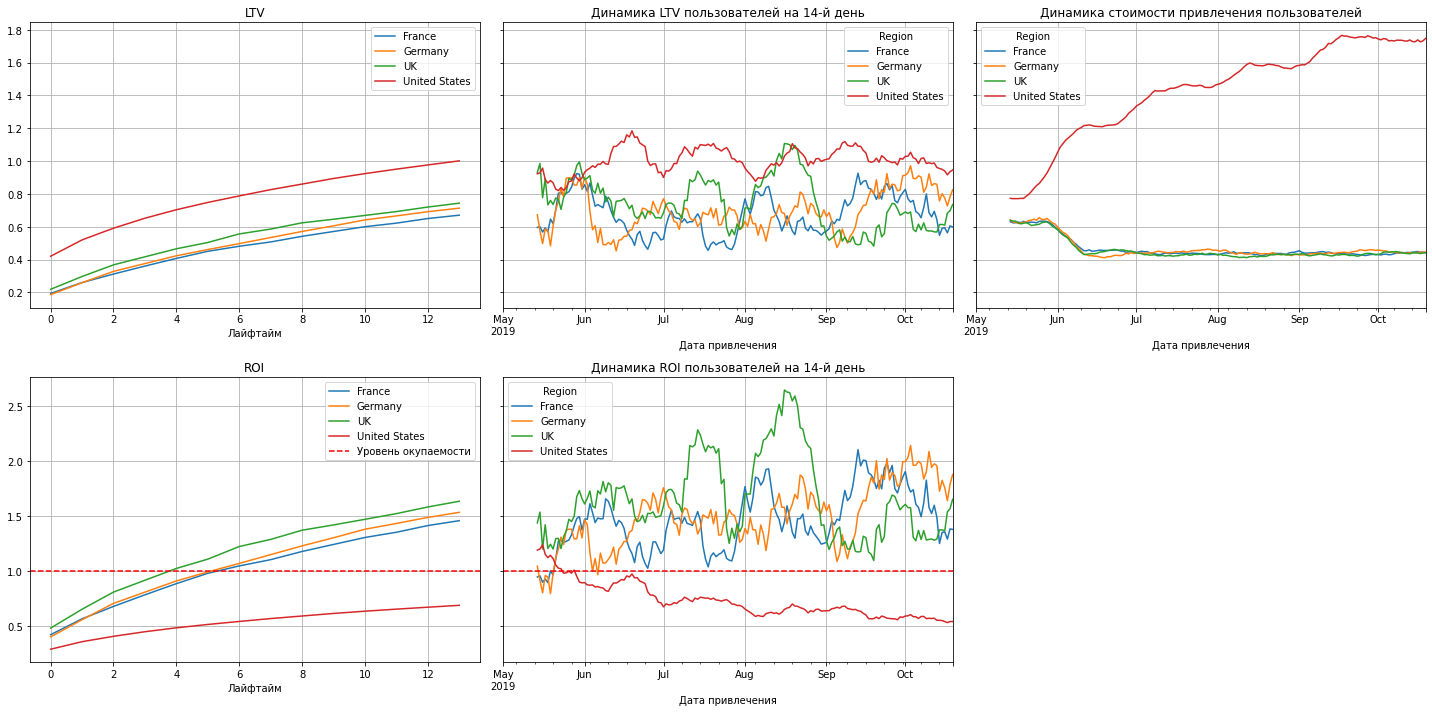

In [59]:
dimensions = ['Region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_CAC, df_orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

**Кажется, что нам удалось отыскать основную проблему: пользователи из США являются для нас убыточными. Проблема заключается в том, что мы имеем слишком большие затраты на рекламу.**

### Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам

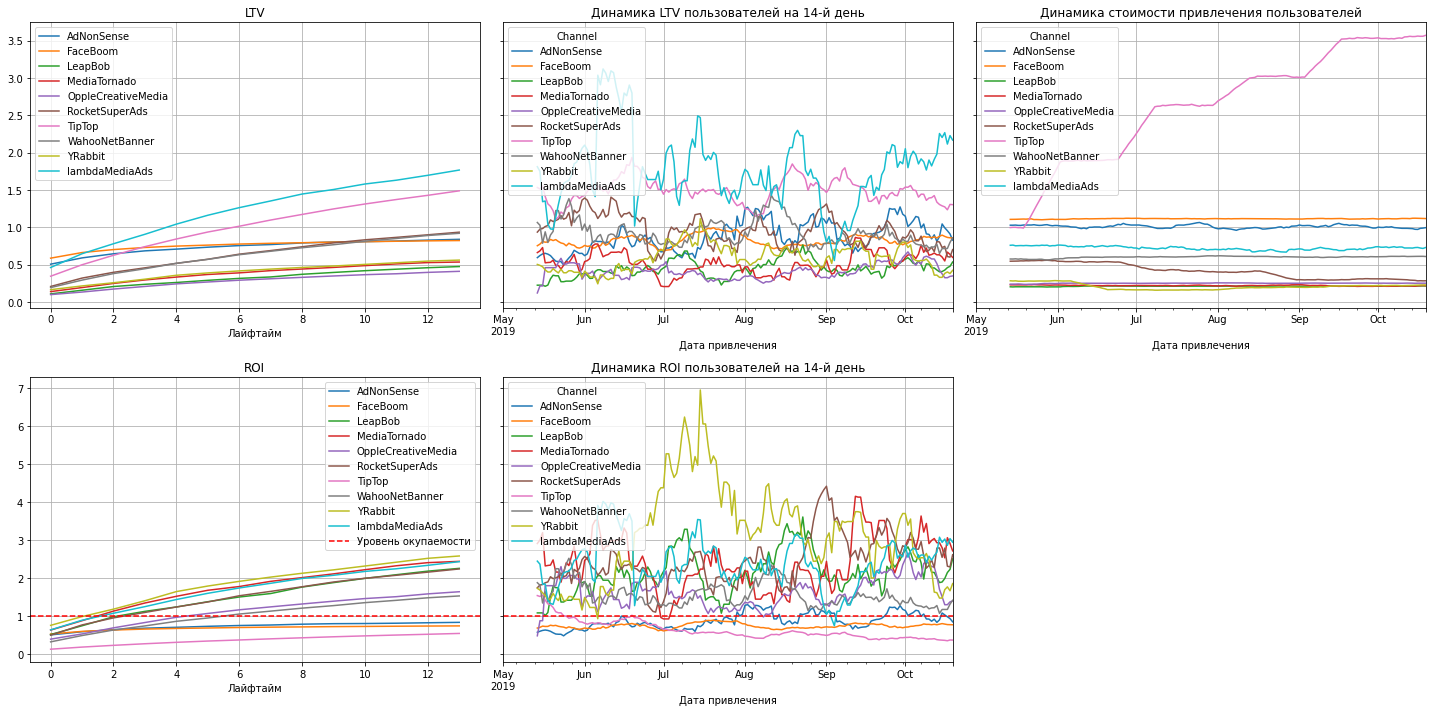

In [60]:
dimensions = ['Channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_CAC, df_orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

**Пазл сошелся. Пользователи tiptop, большинство из которых находятся в США, обходятся нам слишком дорого. Стоимость привлечения постоянно растет, при этом наша выручка от данной категории не спешит расти.**

8.1. **Узнаем, в чём причина: в низкой конверсии или низком удержании.**

Оценим конверсию с разбивкой по рекламным каналам

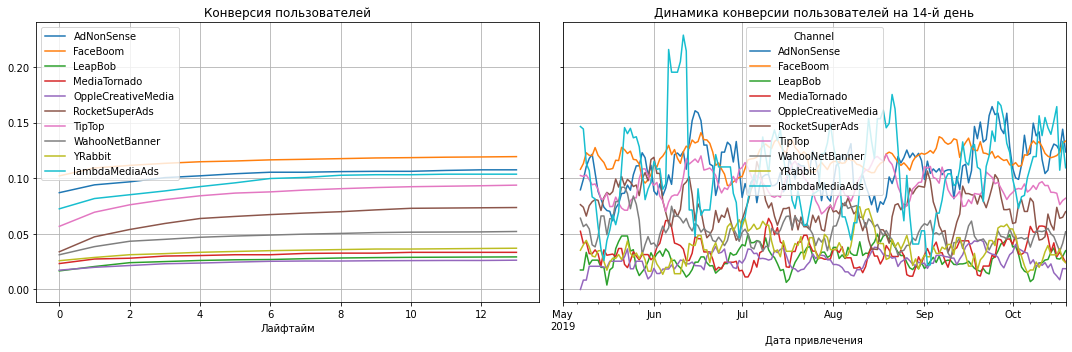

In [61]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_CAC, df_orders, observation_date, horizon_days, dimensions=['Channel']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

А теперь по странам

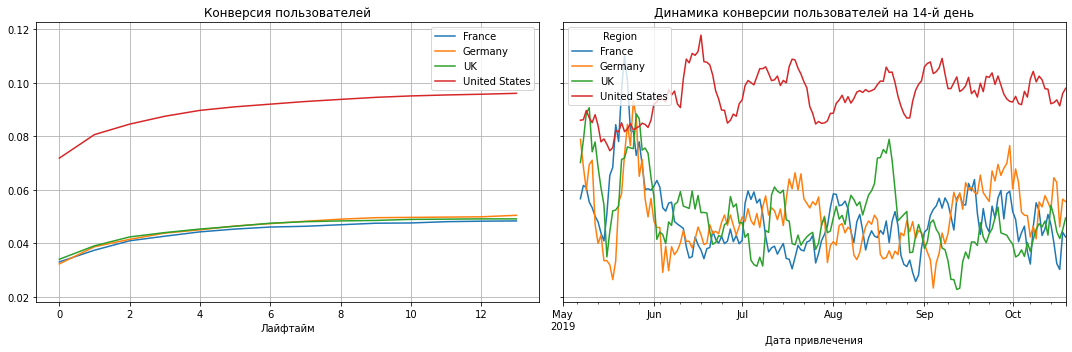

In [62]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_CAC, df_orders, observation_date, horizon_days, dimensions=['Region']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

А теперь по устройствам

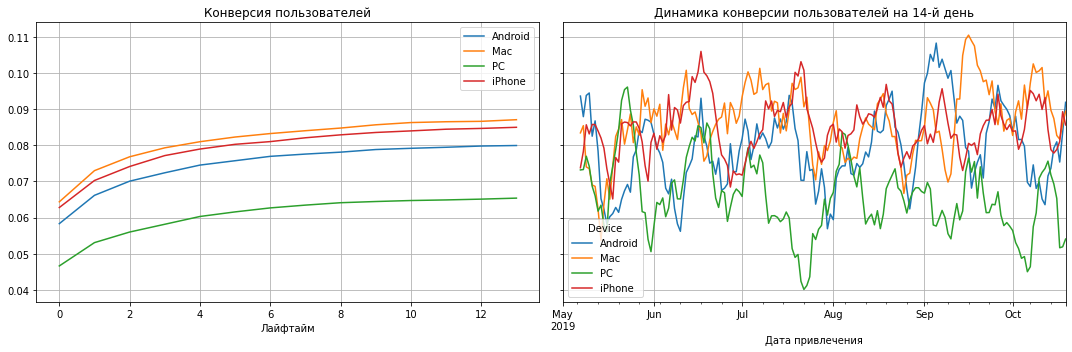

In [63]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_CAC, df_orders, observation_date, horizon_days, dimensions=['Device']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

**Показательным являются графики с конверсией по рекламным каналам. Видно, что ряд рекламных источников показывают достаточно низкую конверсию.**

8.2. **Теперь оценим удержание**

Для рекламных каналов

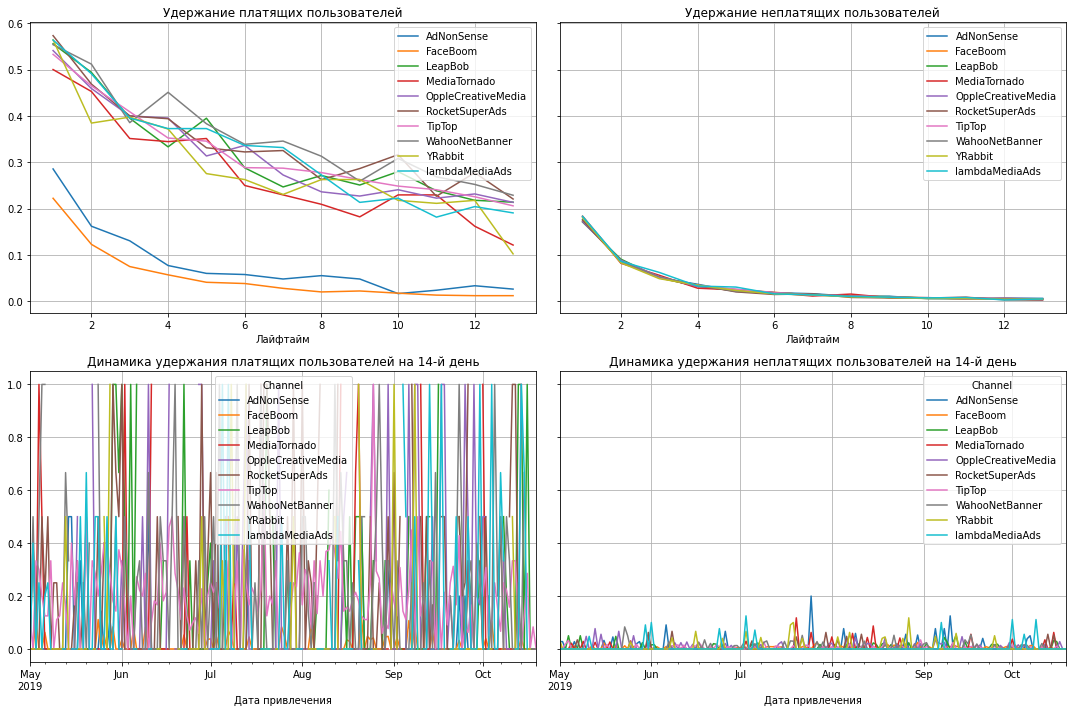

In [64]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_CAC, df_visits, observation_date, horizon_days, dimensions=['Channel']
)

plot_retention(retention_grouped, retention_history, horizon_days)

Для стран

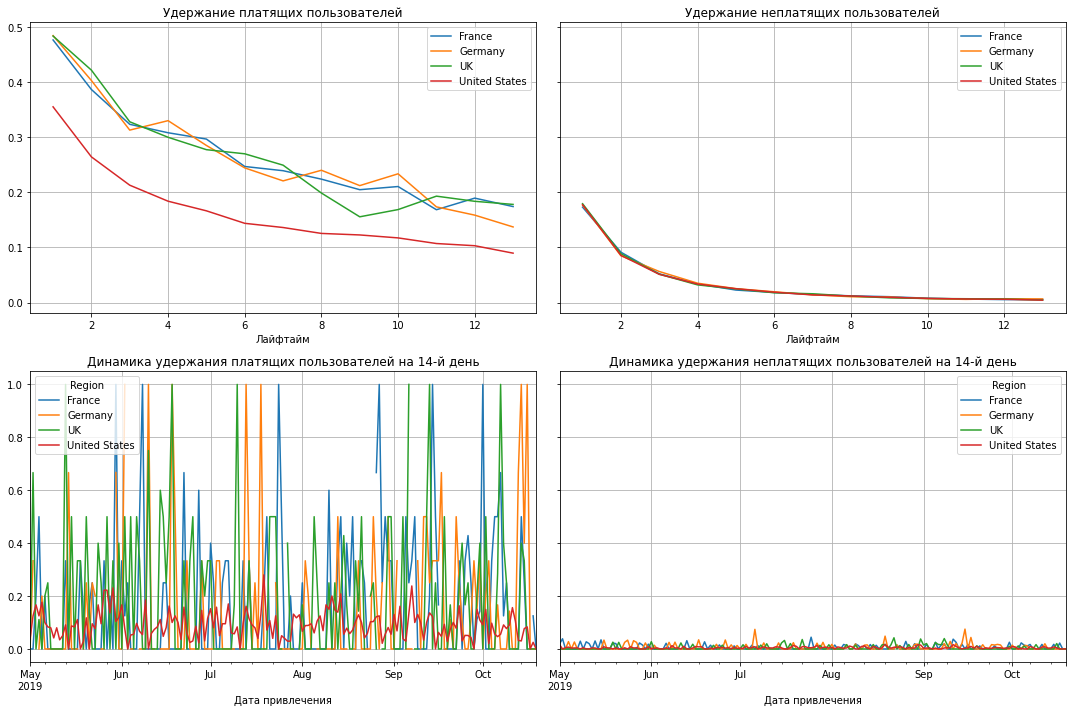

In [65]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_CAC, df_visits, observation_date, horizon_days, dimensions=['Region']
)

plot_retention(retention_grouped, retention_history, horizon_days)

Для устройств

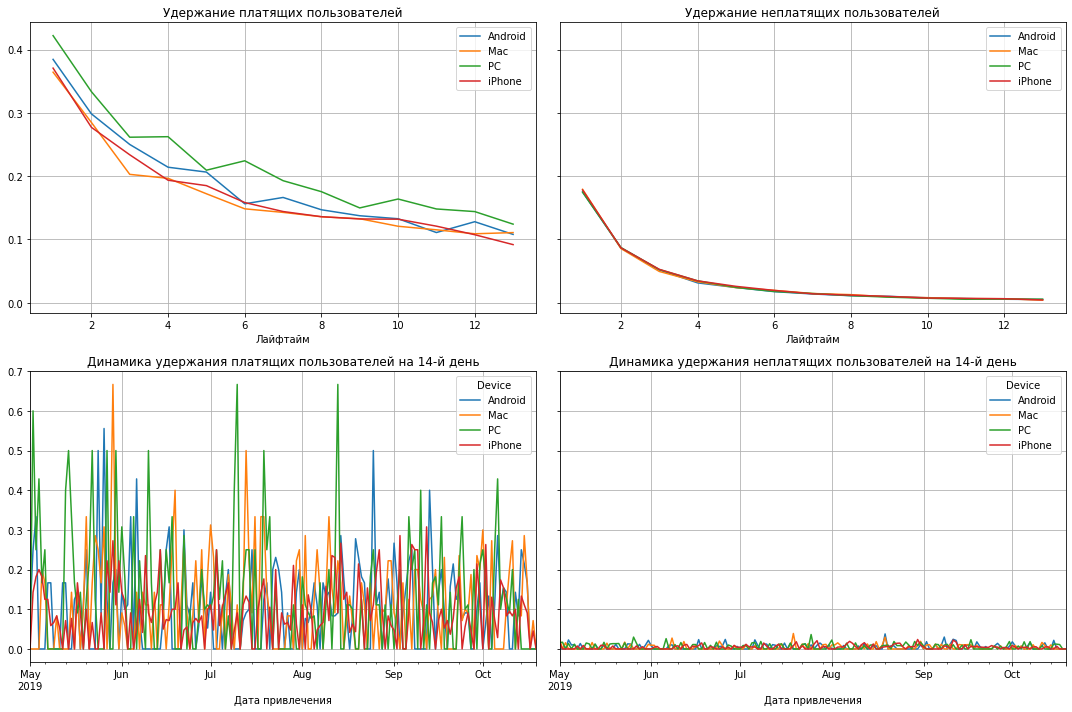

In [66]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_CAC, df_visits, observation_date, horizon_days, dimensions=['Device']
)

plot_retention(retention_grouped, retention_history, horizon_days)

**Хуже всего дела обстоят с пользователями из США и пользователями, привлеченных с Faceboom и AdNoneSense**

# Шаг 6. Напишите выводы
- Выделите причины неэффективности привлечения пользователей;
- Сформируйте рекомендации для отдела маркетинга для повышения эффективности.

По результатам анализа, отмечается следующее:
1. Больше всего приходят посетителей из Америки - 66,6 %, соответственно эта страна дает больше всех платящих пользователей - 6,9 %
2. Чаще всего платящие пользователи заходят с утсройства mac - 6,3 %
3. Наибольшее привлечение шло по каналам FaceBoom и TipTop. Каналы, которые приносят больше всего платящих пользователей - FaceBoom -  12,2 %, AdNonSense - 11,3 %
4. Прослеживается положительная динамика по увеличению охвата (так с 4000 тысяч пользователей, посещающих сайт, охват достигал пиковые значения на отметке 12000 тысяч (увеличение в 3 раза). В разрезе месяцев, в период с 5 по 10 месяц, произошло общее увеличение пользовательской активности с 27111 заходов в месяц до 31175 заходов в месяц (увеличение на 13 %). Вместе с тем, отмечается, что в разрезе недель -на 44 неделе (последняя неделя в рамках анализа) охват пользователей резко упал до 3118 посещений, что является минимальным значением в рассматриваемых данных.
5. Среднее значение сессий в ежедневном формате равняется 1. Это говорит нам о том, что пользователи не заинтересованы в том, чтобы повторно заходить в приложение.
6. В среднем, пользователь проводит в приложении около 30 минут. Медианное значение равно 21 минуте.
7. В среднем, для завершения покупки, человеку необходимо потратить 260 минут, Если брать во внимание медианное значение, то показатель будет равен 1 минуте. Такая большая разница между среднем и медианной определена наличием аномальных значений.
8. Средние затраты по привлечению пользователей, в основном, держатся в районе 1 доллара. Но есть и исключение в виде источника Tiptop: средние затраты выросли с 1 до 3,5 доллара.
9. Пользователи из США являются для нас убыточными (но вместе с тем, они и приносят нам больше всего денег).
10. Пользователи tiptop, большинство из которых находятся в США, обходятся нам слишком дорого. Стоимость привлечения постоянно растет, при этом наша выручка от данной категории не спешит расти.
11. В части удержания пользователей, дела с пользователями из США также обстоят хуже всего.

Рекомендации:
**Для улучшения финансового положения является целесообразным сосредоточится на пользователях из США. Нужно постараться увеличить их заинтересованность в продукте. Кроме того, необходимо сократить расходы на рекламу по источнику Tiptop, он является для нас убыточным.**